In [10]:
import pandas as pd
import plotly.express as px

In [5]:
df = pd.read_csv('../data/nulls_added_heart.csv')

In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [9]:
df.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

### Need to clean cholesterol and RestingBP

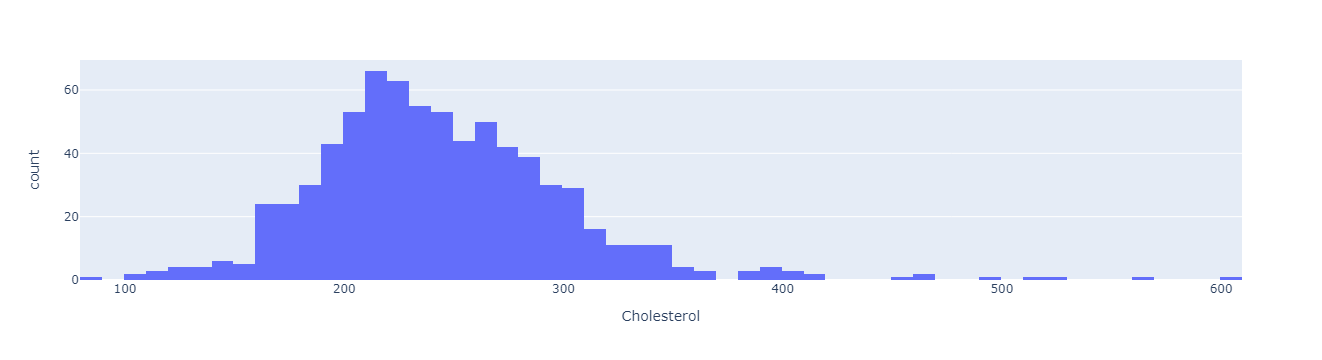

In [14]:
fig = px.histogram(df, x="Cholesterol")
fig.show()

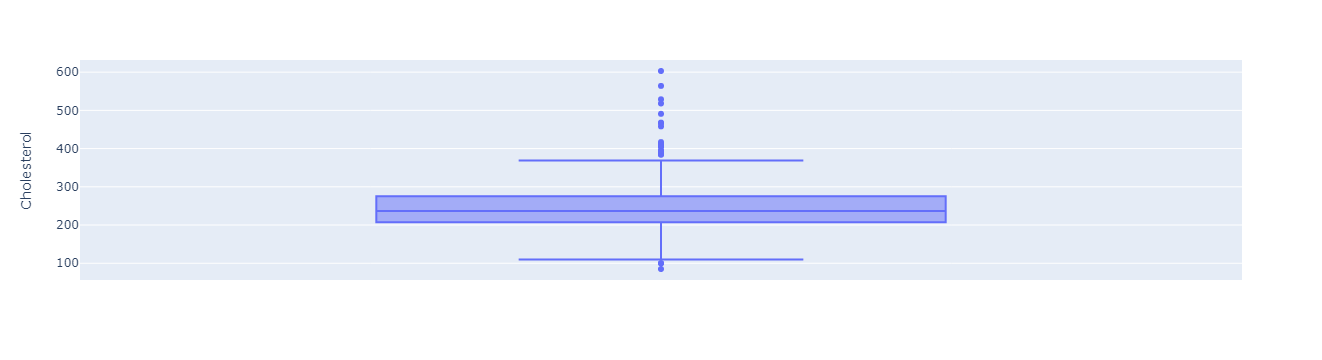

In [16]:
#some outliers present...
fig = px.box(df, y="Cholesterol")
fig.show()

In [27]:
#fill with mean, median? want to fill with other rows that have similar values
#nearest neighbors, but it fill in resting BP as well, which is fine (1 missing value filled in with nearest neighbors is alright)
#but imputer cant take in strings, need to create dummies...
#can just use pd create dummies for now and take the cholesterol column

In [28]:
df_dummies = pd.get_dummies(df)

In [32]:
#get column names to recreate df once knn imputed
colnames = df_dummies.columns

In [19]:
from sklearn.impute import KNNImputer

In [20]:
imputer = KNNImputer(n_neighbors=5)

In [30]:
knn_imputed = imputer.fit_transform(df_dummies)

In [34]:
df_filled = pd.DataFrame(data=knn_imputed, columns=colnames)

In [36]:
df_filled['Cholesterol']

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 918, dtype: float64

In [38]:
df['Cholesterol'] = df_filled['Cholesterol']

In [39]:
df['RestingBP'] = df_filled['RestingBP']

In [41]:
#nulls are filled
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

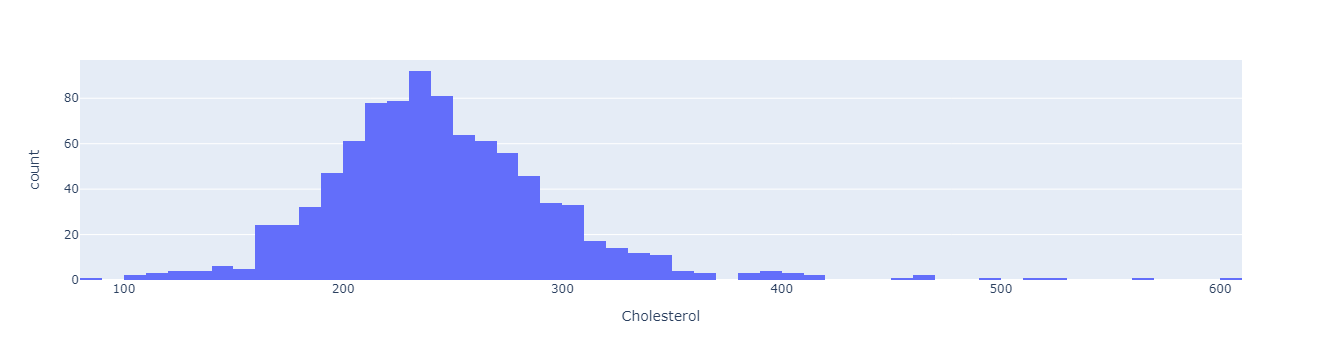

In [42]:
fig = px.histogram(df, x="Cholesterol")
fig.show()

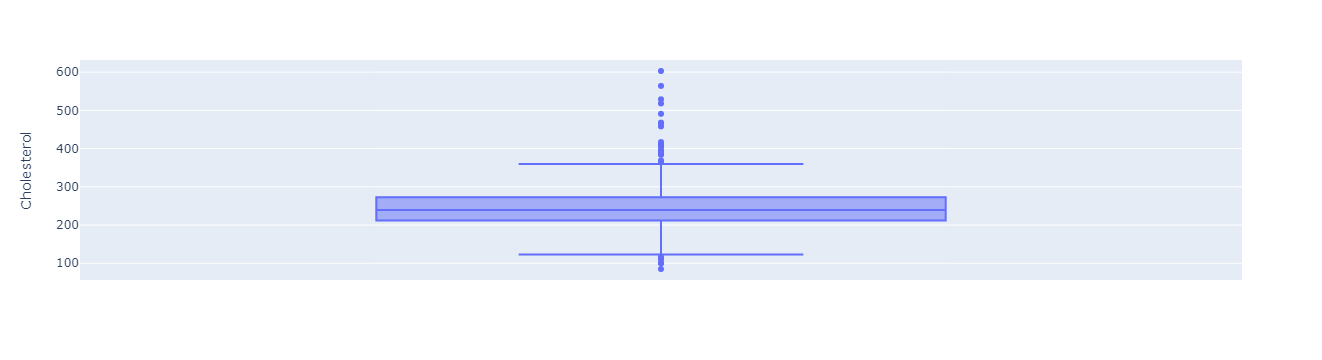

In [43]:
fig = px.box(df, y="Cholesterol")
fig.show()

In [44]:
df.to_csv('../data/cleaned_heart.csv', index=False)

In [1]:
#add local clinic data